# Plan :

    1) Cleaning & introduction to the dataset 

    2) Proportion of the different airbnb flat in the city

    3) Vizualisation of the different area on Singapore by price

    4) Display flat by categories (Entire Home, Shared Room, Private room)
    
    5) Wordcount to see which word appears most often

    6) What About the availability ?
    
    7) Who are the top host ? 

    8) What about the review ? 
    
    9) Sorter
    
    10) Conclusion

# Import csv dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keplergl import KeplerGl 
import plotly.express as px
import ipywidgets as widgets

df = pd.read_csv('singapore.csv')
df.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [2]:
df.shape

(7907, 16)

# Data Cleaning

In [3]:
#On supprime les colonnes qui nous servent à rien
df = df.drop(columns=["last_review","calculated_host_listings_count"])
df["reviews_per_month"].fillna("0", inplace = True) #Remplace valeur NULL par 0 dans les avis/mois
df.drop(df.loc[df['price']==0].index, inplace=True) #Supprime les lignes avec des prix à 0 euros
df.drop(df[(df['price']<1)].index, inplace=True)
df.drop(df[(df['price']>9000)].index, inplace=True)

In [4]:
df.shape

(7903, 14)

# Proportion of the different Airbnb flat on Singapore 

In [16]:
map_1 = KeplerGl(height=500)
map_1.add_data(data=df, name="data_2")
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data_2': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

We can see that the repartition of the different flat is very oriented on the south of the country. It means that the South correspond to the middle activity (touristic, economical) of the country

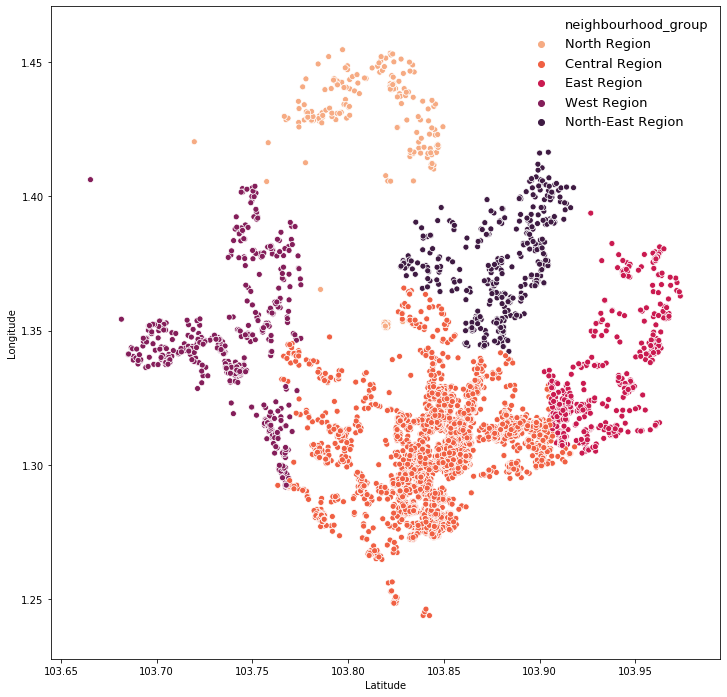

In [15]:
plt.figure(figsize=(12,12))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='rocket_r')
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

# Concentration by Neighbourhood Group

In [7]:
neigh = pd.DataFrame(df['neighbourhood_group'].value_counts())
neigh.columns=['Listings']
neigh['Neighbourhood Group'] = neigh.index
neigh.reset_index(drop=True, inplace=True)
neigh

Listings Neighbourhood Group
0      6307      Central Region
1       538         West Region
2       508         East Region
3       346   North-East Region
4       204        North Region

In [8]:
fig = px.pie(neigh, values='Listings', names='Neighbourhood Group',title="Percentage listings Airbnb by Neighbourhood Group")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# Vizualisation of the different area on Singapore by price

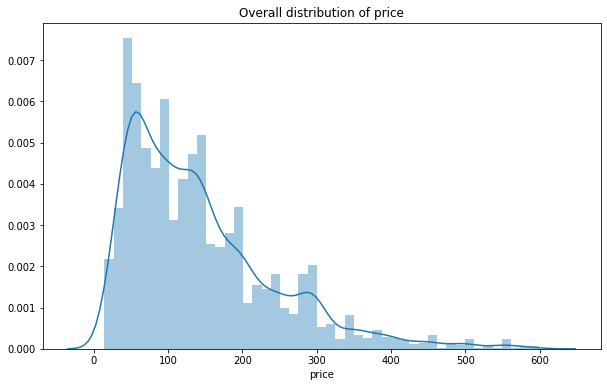

In [189]:
plt.figure(figsize = (10,6))
prix = df[(df['price'] < 600)]
sns.distplot(prix["price"])
plt.title("Overall distribution of price")
plt.show()

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

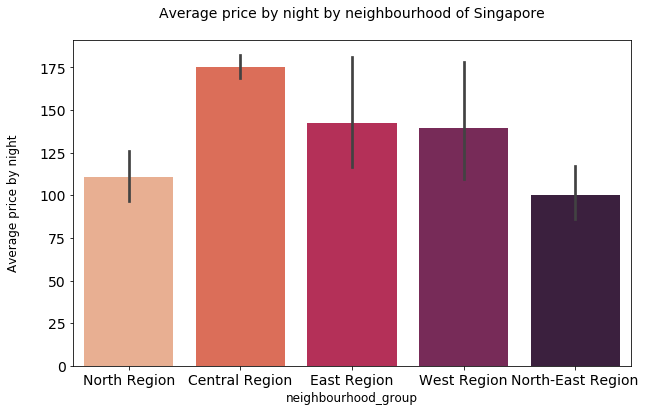

In [190]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['neighbourhood_group'], y=df['price'], palette="rocket_r")
plt.xlabel('neighbourhood_group', size ="12")
plt.ylabel('Average price by night\n', size ="12")
plt.title("Average price by night by neighbourhood of Singapore\n", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Not lot of differences between all the differents neighbourhood_group (maybe it can be explain by some outlier that you can find on all the differents neighbourhood group)

# Map of price

In [33]:
map_1 = KeplerGl(height=650)
map_1.add_data(data=df, name="data_1")
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data_1': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

# Display flat by categories (Entire Home, Shared Room, Private room) 

Text(0.5, 1.0, 'Room Type most represent in Singapore by categories \n')

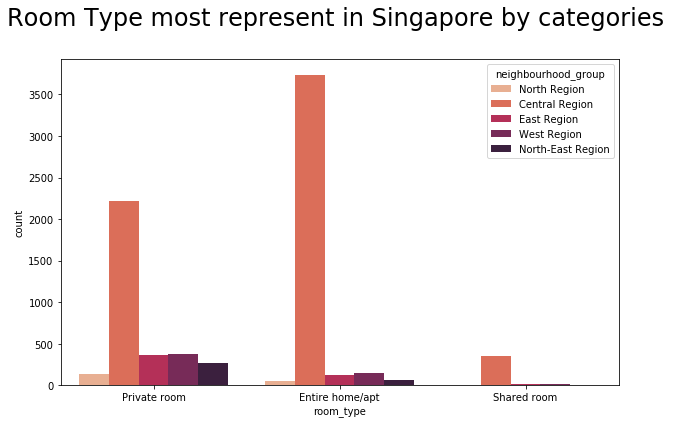

In [192]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df, palette="rocket_r")
plt.title("Room Type most represent in Singapore by categories \n",size ="24")

<Figure size 1080x432 with 0 Axes>

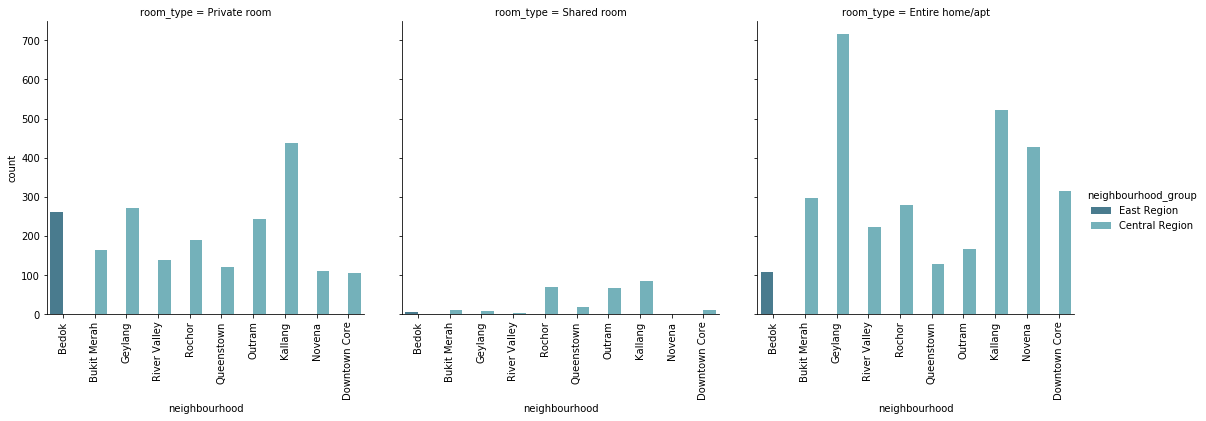

In [193]:
top_nei = df['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index'].tolist()

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=df.loc[df['neighbourhood'].isin(top_nei)], kind='count', palette='GnBu_d')
vis_3.set_xticklabels(rotation=90)

In [34]:
map_2 = KeplerGl(height=600)
map_2.add_data(data=df, name="data_2")
map_2

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data_2': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

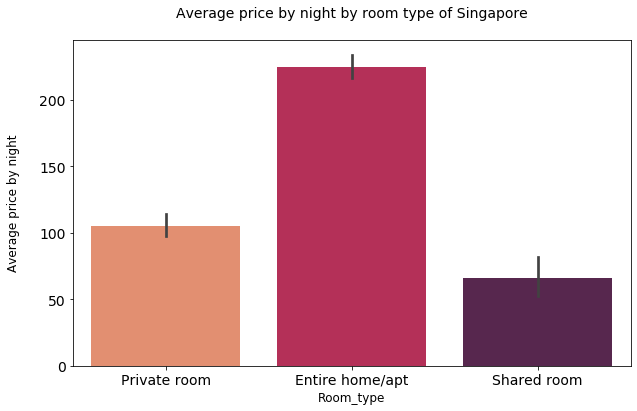

In [195]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['room_type'], y=df['price'], palette="rocket_r")
plt.xlabel('Room_type', size ="12")
plt.ylabel('Average price by night\n', size ="12")
plt.title("Average price by night by room type of Singapore\n", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Wordcount to see which word appears most often

<Figure size 720x432 with 0 Axes>

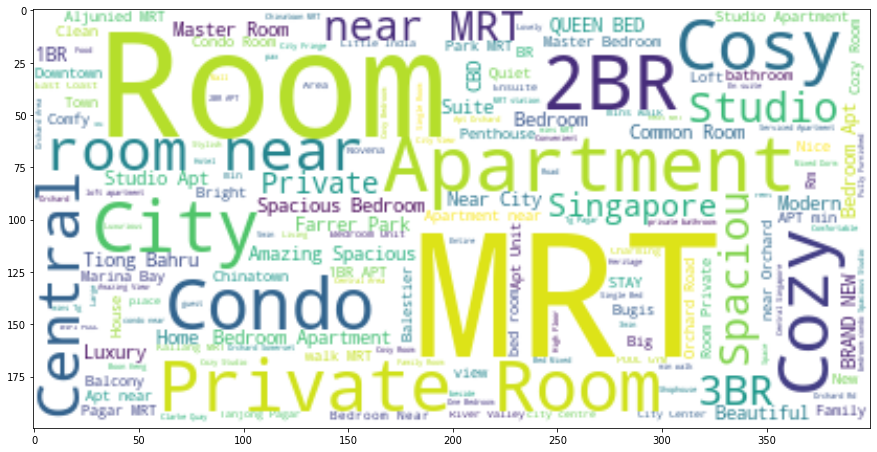

In [196]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
plt.figure(figsize=(10,6))

text = " ".join(str(each) for each in df.name)
stopwords = set(STOPWORDS)
stopwords.update('city', 'Singapore', 'Apartment','room', 'Room', 'singapore','Bedroom')
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')

We can see a lot some word like Modern, Cosy, Master Room to describe all the different room, but also some touristic places like 
Farrer Park, city Center iong Bahru giving us the most touristic place in the country

# What About the availability ? 

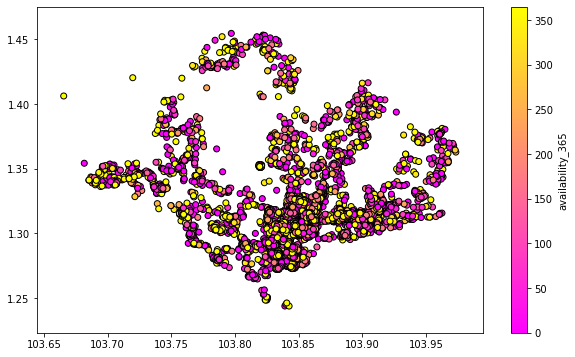

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('availability_365')

It seem that there no specific place which you can find airbnb room for long time, because all the different place of Singapore are interactive (Big university, Huge companies) (Homogenous for the availability)

# Is there a link between the price, the neighbourhood and the availability ?

In [30]:
fig = px.scatter_3d(df, x='price', y='neighbourhood_group', z='availability_365', color='price', 
                    hover_name='name', hover_data=['price', 'minimum_nights', 'id'], 
                    template='plotly_dark', opacity=0.9, title='3d visualisation',)

fig.show()

In [44]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['price'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = 0,
                   cmax = 2000),
        dimensions = list([
            dict(range = [0,2000],
                 constraintrange = [0,2000],
                 label = "Price", values = df['price']),
            dict(range = [0,400],
                 label = "Number of Review", values = df['number_of_reviews']),
            dict(range = [1, 1000],
                 label = 'Availability_365', values = df['availability_365'])
])
    )
)
fig.show()

# By which features, the price is correlated ?

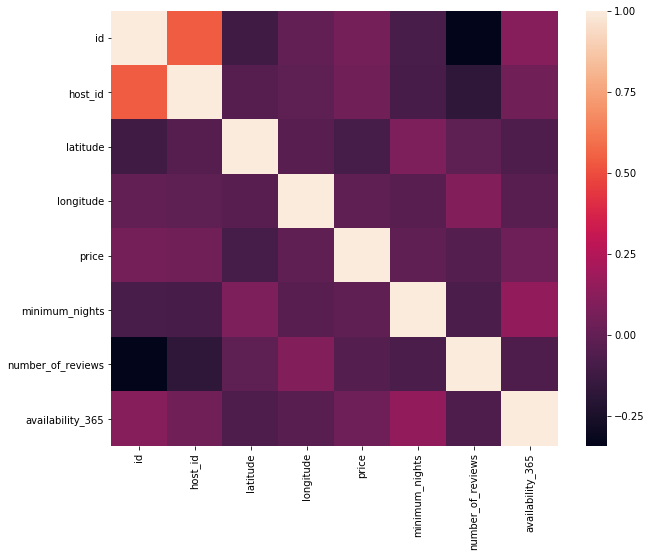

In [199]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

There is no major correlation, we can insure that the availability, the neighbourhood, or also the minimum night don't play a role on the price

# Who are the top host and where do they come from ?  

In [200]:
nbre_avismax = df[['number_of_reviews','host_id', 'neighbourhood_group']]
toz = nbre_avismax.sort_values(by=['number_of_reviews'], ascending=False)
toz.set_index('host_id')
toz = toz.head(10)

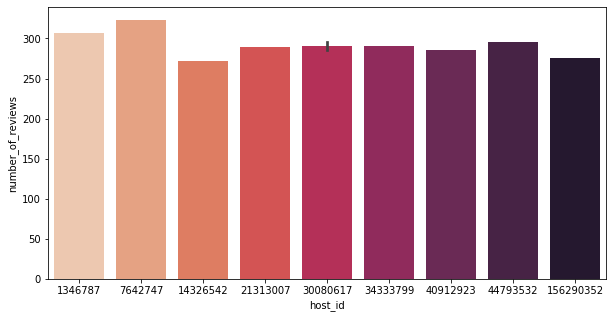

In [201]:
plt.subplots(figsize=(10,5))
sns.barplot(x = toz['host_id'] ,y= toz['number_of_reviews'], palette="rocket_r")

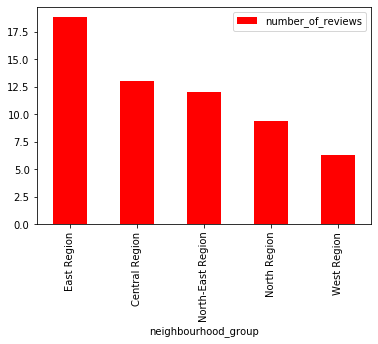

In [43]:
RVQ = df[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').mean()
rrr = RVQ.sort_values(by = 'number_of_reviews', ascending=False)
rrr.plot(kind='bar', color='red')

In [36]:
map_1 = KeplerGl(height=650)
map_1.add_data(data=df, name="data_1")
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data_1': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

Indeed, we can see that there is no place more dynamic than an other because the number of revew reflect the trafic of the flat and of course, if a flat got a lot of review, this means that the place is dynamic
It can be explain by two fact : Singapore is a small country in terms of superficy, and Singapore is very well well served by public transportation

In [204]:
tophost = (pd.DataFrame(df.host_id.value_counts()))
tophost.columns=['Listings']
tophost['host_id'] = tophost.index
tophost.reset_index(drop=True, inplace=True)
tophost.head()

Listings    host_id
0       274   66406177
1       203    8492007
2       157  209913841
3       141   29420853
4       114   31464513

In [205]:
fig = px.pie(tophost, values='Listings', names='host_id',title="Percentage listings Airbnb by Neighbourhood Group")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

It seem that some people or agency, manage many different flat on Singapore so it's a real business

# Sorter

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def how_articles_more_than(column=['price'], 
                            x=(10, 150)):
    return df.loc[df[column] < x] 

interactive(children=(Dropdown(description='column', options=('price',), value='price'), IntSlider(value=80, d…

# Conclusion

Singapore is a very popular despite its small supercy. Furthemore, it is very touristic, and this explain the popularity of Airbnb Plateform on the country. It's for some people, a real business which is illegal. The country is homogeneous, there is no place very cheaper than an other.  